07-Dec-23 20:46:40: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
07-Dec-23 20:46:40: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
07-Dec-23 20:46:41: Time clip was applied to: thg_mag_frd


2023-12-07T20:46:42.107553-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_REU49.h5 in mode w
2023-12-07T20:46:45.465848-0800 | WARNING | mth5.clients.fdsn | wrangle_runs_into_containers | More or less runs have been requested by the user than are defined in the metadata. Runs will be defined but only the requested run extents contain time series data based on the users request.
2023-12-07T20:46:45.469853-0800 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2023-12-07T20:46:45.484849-0800 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2023-12-07T20:46:45.502857-0800 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2023-12-07T20:46:45.533896-0800 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2023-12-07T20:46:45.562880-0800 | INFO | mth5.groups.base | _

07-Dec-23 20:46:46: Removing cached c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
07-Dec-23 20:46:46: Creating cached c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5


2023-12-07T20:46:48.329216-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
2023-12-07T20:46:48.760179-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAW50.h5 in mode w
2023-12-07T20:46:51.439484-0800 | WARNING | mth5.clients.fdsn | wrangle_runs_into_containers | More or less runs have been requested by the user than are defined in the metadata. Runs will be defined but only the requested run extents contain time series data based on the users request.
2023-12-07T20:46:51.442446-0800 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2023-12-07T20:46:51.474441-0800 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2023-12-07T20:46:51.503441-0800 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2023-12-07T20:46:51.638511-0800

07-Dec-23 20:46:52: Removing cached c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5
07-Dec-23 20:46:52: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5


2023-12-07T20:46:53.981950-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5


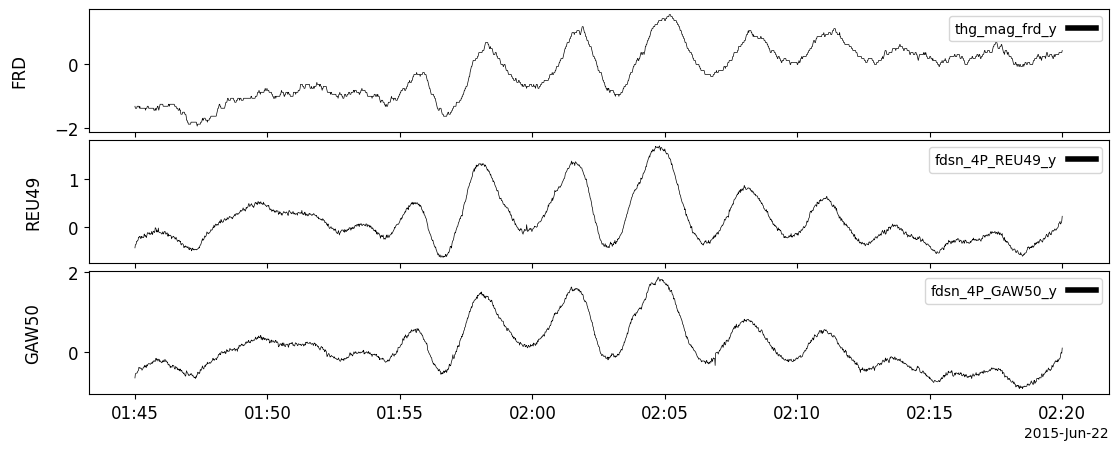

In [2]:
import pyspedas, pytplot
import numpy as np
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)
load_fdsn(network="4P", station="REU49", trange=[date_start, date_end])
load_fdsn(network="4P", station="GAW50", trange=[date_start, date_end])

tplot_vars = ['thg_mag_frd_y', 'fdsn_4P_REU49_y', 'fdsn_4P_GAW50_y']
for var in tplot_vars:
   pytplot.split_vec(var[:-2])
   time, by = pytplot.get_data(var)  # Unpack tplot variable
   by -= np.median(by)  # Subtract median   
   pytplot.options(var, opt_dict={"legend_names": [var], "ytitle": var.split("_")[2].upper()}) 
   
pytplot.tplot(tplot_vars)